<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%D0%94%D0%97_5_Light_RNN_%D0%B8_CNN_%D0%B4%D0%BB%D1%8F_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов писателей

# Подготовка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Чтение файлов
import os
os.chdir('/content/drive/My Drive/Занятие_4_Обработка текстов с помощью нейросетей/data/Тексты писателей')
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['(О. Генри) Обучающая_50 вместе.txt',
 '(Клиффорд_Саймак) Тестовая_2 вместе.txt',
 '(Булгаков) Обучающая_5 вместе.txt',
 '(Макс Фрай) Обучающая_5 вместе.txt',
 '(О. Генри) Тестовая_20 вместе.txt',
 '(Клиффорд_Саймак) Обучающая_5 вместе.txt',
 '(Булгаков) Тестовая_2 вместе.txt',
 '(Макс Фрай) Тестовая_2 вместе.txt',
 '(Рэй Брэдберри) Тестовая_8 вместе.txt',
 '(Стругацкие) Тестовая_2 вместе.txt',
 '(Рэй Брэдберри) Обучающая_22 вместе.txt',
 '(Стругацкие) Обучающая_5 вместе.txt',
 'best_modelED_Adam_15000_20.h5',
 'shared_input_layer.png',
 'model.png']

In [2]:
# функция чтения текстов
def readText(fileName):
  f = open(fileName, 'r') # открыли файл
  text = f.read() # считали файл
  text = text.replace("\n", " ")  # заменили переносы строк на пробелы

  return text

# Интересующие нас авторы
className = ["Генри", "Стругацкие", "Булгаков", "Клиффорд", "Макс", "Брэдберри"] 
nClasses = len(className) # посчитали количество авторов (число классов)

# загружаем тексы в базы
trainText = []
testText = []

for i in className:
  for j in os.listdir():
    if i in j:
      if 'Обучающая' in j:
        trainText.append(readText(j))
        print('train: ', j)
      if 'Тестовая' in j:
        testText.append(readText(j))
        print('Test: ', j)

print('\nЭлементов в train: ', len(trainText), '\nЭлементов в test: ', len(testText))

train:  (О. Генри) Обучающая_50 вместе.txt
Test:  (О. Генри) Тестовая_20 вместе.txt
Test:  (Стругацкие) Тестовая_2 вместе.txt
train:  (Стругацкие) Обучающая_5 вместе.txt
train:  (Булгаков) Обучающая_5 вместе.txt
Test:  (Булгаков) Тестовая_2 вместе.txt
Test:  (Клиффорд_Саймак) Тестовая_2 вместе.txt
train:  (Клиффорд_Саймак) Обучающая_5 вместе.txt
train:  (Макс Фрай) Обучающая_5 вместе.txt
Test:  (Макс Фрай) Тестовая_2 вместе.txt
Test:  (Рэй Брэдберри) Тестовая_8 вместе.txt
train:  (Рэй Брэдберри) Обучающая_22 вместе.txt

Элементов в train:  6 
Элементов в test:  6


## Загрузка данных и разделение на слова

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #инструменты предобработки текста от кераса
from sklearn.model_selection import train_test_split #модуль для разбиения данных на обучающую и тестовую выборки
from tensorflow.keras import utils # Для работы с категориальными данными
import numpy as np #библиотека для работы с массивами данных
import pandas as pd #библиотека для обработки и анализа данных

In [4]:
# Преобразование текстовых данных в числовые/векторные
maxWordsCount = 20000 # определяем максимальное количество уникальных слов для обучения

tokenizer = Tokenizer(num_words=maxWordsCount,
                      filters='0123456789–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff',
                      lower = True,
                      split=' ', char_level=False, oov_token = 'unknown')
# выше задаем параметры:
# (num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
# (filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
# (lower=True) - приводим слова к нижнему регистру
# (split=' ') - разделяем слова по пробелу
# (char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(trainText) # токенизировали текст
items = list(tokenizer.word_index.items()) # достали индексы слов
print(items[:10])

#print("Протестируем словарь частотности")
#print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("уточните слово: ")]) #протестируем словарь частотности


# преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) # обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)   # проверочные тесты в индексы
print("\nВзглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1] [:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:20])

[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10)]

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Он же в виде последовательности индексов:  [470, 22, 1, 49, 2, 12679, 7693, 5, 415, 1, 4, 252, 2, 4, 247, 55, 6, 240, 10479, 2642]


## Создаем словарь и переводим данные в индексы.

In [5]:
# разрезаем текст на вектора

def getSetFromIndexes(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
  
  return xSample

In [6]:
# функции формирования test и train  выборок

def createSetsMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из классов
  # Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) # задаем количество классов выборки
  classesXSamples = []        # здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна(например 6 по 1341*1000)"
  for wI in wordIndexes:      # для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  # Формируем один общий xSamples
  xSamples = [] # здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] # здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной число классов"
  
  for t in range(nClasses):  # в диапазоне кол-ва классов
    xT = classesXSamples[t]  # берем очередной текст вида "кол-во окон в тексте*длину окна"(например 1341*1000)
    for i in range(len(xT)): # и каждое его окно
      xSamples.append(xT[i]) # добавляем в общий список выборки
    
    # Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, nClasses) # текущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    for i in range(len(xT)): # на каждое окно выборки 
      ySamples.append(currY) # добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) # переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) # переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples)   # функция возвращает выборку и соответствующие векторы классов

## Создание обучающей выборки

In [7]:
# базовые параметры
xLen = 1000 # длина отрезка, по которому анализируем
step = 100 # шаг разбиения xLen на вектора

# формирование выборок
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) # извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    # извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
# получили обучающий/тестовый набор, достаточный для запуска Embedding, 
# но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(17625, 1000)
(17625, 6)
(6688, 1000)
(6688, 6)


## Распознавание проверочной выборки


In [8]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из 6 классов
  # Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) # задаем количество классов
  xTest6Classes01 = []               # здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 # здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:             # для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) # тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))       # переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) # трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     # и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes # функция вернёт тестовые данные: TestBg 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  for i in range(nClasses):
    # Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
  print()
  return sumVal/sumCount

xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step) # подгоним форму тестовых классов под функцию recognizeMultiClass

# Нейронные сети

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation # сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional # рекуррентные слои
from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers.merge import concatenate
from keras.utils import plot_model
import time # чтобы зачсечь время

import matplotlib.pyplot as plt # Для вывода графиков
%matplotlib inline

## Embedding + Dense сеть


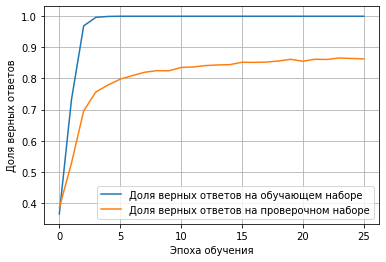

НЕЙРОНКА:  Embedding + Dense сеть

Генри  распознано  98 % сеть считает, что это  Генри ,  распознано ВЕРНО!
Стругацкие  распознано  86 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  77 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  83 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  91 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  85 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  86 %

Время обработки: 168.43c


In [12]:
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.0001
nEmbedding = 50

input_layer = Input(shape=(xLen, ))
ED_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
ED_2 = SpatialDropout1D(nDropout)(ED_1)
# ED_3 = BatchNormalization()(ED_2)  # лучше работает без этого слоя
ED_3 = Flatten()(ED_2)
ED_4 = Dense(nDense, activation='softmax')(ED_3)

modelED = Model(inputs=input_layer, outputs=ED_4)
modelED.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 0,  restore_best_weights = True)

#Обучаем на xTrain
history = modelED.fit(xTrain, yTrain, epochs=epochs, verbose = 0,
                      callbacks = early_stopping,
                      validation_data = (xTest, yTest))


plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelED, xTest6Classes, "Embedding + Dense сеть") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

## Embedding + LSTM сеть

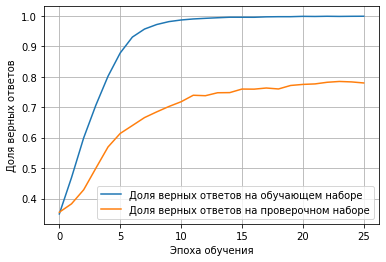

НЕЙРОНКА:  Embedding + LSTM сеть

Генри  распознано  94 % сеть считает, что это  Генри ,  распознано ВЕРНО!
Стругацкие  распознано  72 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  69 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  71 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  84 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  79 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  78 %

Время обработки: 764.63c


In [10]:
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.00001
nEmbedding = 50

input_layer = Input(shape=(xLen, ))
ELSTM_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
ELSTM_2 = SpatialDropout1D(nDropout)(ELSTM_1)
ELSTM_3 = BatchNormalization()(ELSTM_2)
ELSTM_4 = LSTM(xLen//10, return_sequences=True)(ELSTM_3) # правильно поставить от xLen
ELSTM_5 = Flatten()(ELSTM_4)
ELSTM_6 = Dropout(nDropout)(ELSTM_5)
ELSTM_7 = Dense(nDense, activation='softmax')(ELSTM_6)

modelELSTM = Model(inputs=input_layer, outputs=ELSTM_7)
modelELSTM.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 0,  restore_best_weights = True)

#Обучаем на xTrain
history = modelELSTM.fit(xTrain, yTrain, epochs=epochs, verbose = 0,
                         callbacks = early_stopping,
                         validation_data = (xTest, yTest))


plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelELSTM, xTest6Classes, "Embedding + LSTM сеть") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время


## Embedding + Bidirectional LSTM

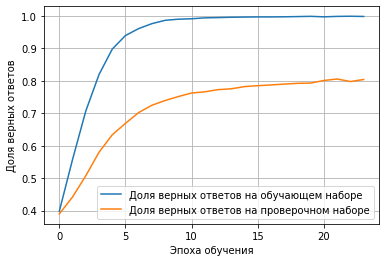

НЕЙРОНКА:  Embedding + Bidirectional LSTM

Генри  распознано  97 % сеть считает, что это  Генри ,  распознано ВЕРНО!
Стругацкие  распознано  87 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  69 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  83 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  81 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  77 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  80 %

Время обработки: 1252.5c


In [34]:
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.00001
nEmbedding = 50

input_layer = Input(shape=(xLen, ))
EBiLSTM_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
EBiLSTM_2 = SpatialDropout1D(nDropout)(EBiLSTM_1)
EBiLSTM_3 = BatchNormalization()(EBiLSTM_2)
EBiLSTM_4 = Bidirectional(LSTM(xLen//10, return_sequences=True))(EBiLSTM_3) # правильно поставить от xLen
EBiLSTM_5 = Flatten()(EBiLSTM_4)
EBiLSTM_6 = Dropout(nDropout)(EBiLSTM_5)
EBiLSTM_7 = Dense(nDense, activation='softmax')(EBiLSTM_6)

modelEBiLSTM = Model(inputs=input_layer, outputs=EBiLSTM_7)
modelEBiLSTM.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 0,  restore_best_weights = True)

#Обучаем на xTrain
history = modelEBiLSTM.fit(xTrain, yTrain, epochs=epochs, verbose = 1,
                           callbacks = early_stopping,
                           validation_data = (xTest, yTest))


plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelEBiLSTM, xTest6Classes, "Embedding + Bidirectional LSTM") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

## Embedding + GRU

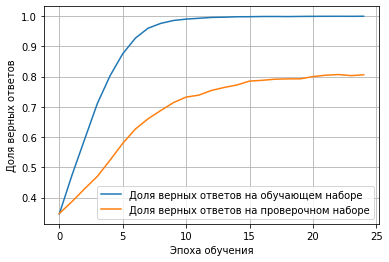

НЕЙРОНКА:  Embedding + GRU

Генри  распознано  94 % сеть считает, что это  Генри ,  распознано ВЕРНО!
Стругацкие  распознано  82 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  73 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  64 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  88 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  74 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  80 %

Время обработки: 690.98c


In [15]:
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.00001
nEmbedding = 50

input_layer = Input(shape=(xLen, ))
GRU_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
GRU_2 = SpatialDropout1D(nDropout)(GRU_1)
GRU_3 = BatchNormalization()(GRU_2)
#GRU_4 = GRU(xLen//10, dropout=nDropout, recurrent_dropout=nDropout, return_sequences=True, activation="relu")(GRU_3) # сильно замедляет
GRU_4 = GRU(xLen//10, return_sequences=True)(GRU_3) # правильно поставить от xLen
GRU_5= Flatten()(GRU_4)
GRU_6 = Dense(nDense, activation='softmax')(GRU_5)

modelGRU = Model(inputs=input_layer, outputs=GRU_6)
modelGRU.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 0,  restore_best_weights = True)

#Обучаем на xTrain
history = modelGRU.fit(xTrain, yTrain, epochs=epochs, verbose = 0,
                       callbacks = early_stopping,
                       validation_data = (xTest, yTest))
  

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelGRU, xTest6Classes, "Embedding + GRU") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

## Embedding + Conv1D

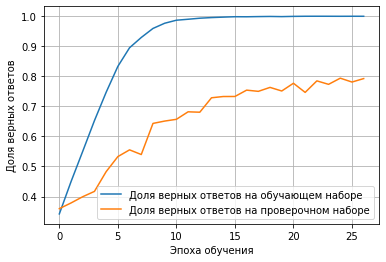

НЕЙРОНКА:  Embedding + Conv1D

Генри  распознано  94 % сеть считает, что это  Генри ,  распознано ВЕРНО!
Стругацкие  распознано  77 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  73 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  77 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  84 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  73 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  79 %

Время обработки: 344.86c


In [33]:
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.00001
nEmbedding = 50

input_layer = Input(shape=(xLen, ))
Conv1D_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
Conv1D_2 = SpatialDropout1D(nDropout)(Conv1D_1)
Conv1D_3 = BatchNormalization()(Conv1D_2)
Conv1D_4 = Conv1D(xLen, 5, activation="relu")(Conv1D_3)
Conv1D_5 = MaxPooling1D(2)(Conv1D_4)
Conv1D_6 = Flatten()(Conv1D_5)
Conv1D_7 = Dropout(nDropout)(Conv1D_6)
Conv1D_8 = Dense(nDense, activation='softmax')(Conv1D_7)

modelConv1D = Model(inputs=input_layer, outputs=Conv1D_8)
modelConv1D.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 0,  restore_best_weights = True)

#Обучаем на xTrain
history = modelConv1D.fit(xTrain, yTrain, epochs=epochs, verbose = 0,
                          callbacks = early_stopping,
                          validation_data = (xTest, yTest))
  

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelConv1D, xTest6Classes, "Embedding + Conv1D") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

## Embedding + SimpleRNN

Epoch 1/100
551/551 [==============================] - 387s 702ms/step - loss: 0.9829 - accuracy: 0.6174 - val_loss: 1.7134 - val_accuracy: 0.4613
Epoch 2/100
551/551 [==============================] - 385s 698ms/step - loss: 0.0812 - accuracy: 0.9782 - val_loss: 1.9883 - val_accuracy: 0.5386
Epoch 3/100
551/551 [==============================] - 386s 701ms/step - loss: 0.0171 - accuracy: 0.9963 - val_loss: 2.4764 - val_accuracy: 0.5016
Epoch 4/100
551/551 [==============================] - 386s 700ms/step - loss: 0.0085 - accuracy: 0.9981 - val_loss: 2.0937 - val_accuracy: 0.5437
Epoch 5/100
551/551 [==============================] - 388s 704ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 1.8146 - val_accuracy: 0.5492
Epoch 6/100
551/551 [==============================] - 388s 705ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 2.0247 - val_accuracy: 0.5523
Epoch 7/100
551/551 [==============================] - 389s 707ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 2

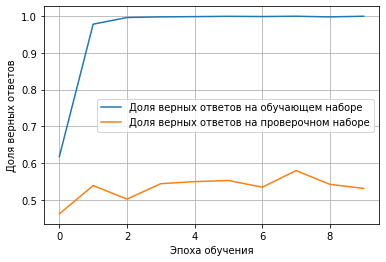

НЕЙРОНКА:  Embedding + SimpleRNN

Генри  распознано  18 % сеть считает, что это  Булгаков ,  распознано НЕ ВЕРНО!
Стругацкие  распознано  67 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  46 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  53 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  89 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  32 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  57 %

Время обработки: 3890.27c


In [10]:
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.0001
nEmbedding = 50

input_layer = Input(shape=(xLen, ))
SimpleRNN_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
SimpleRNN_2 = SpatialDropout1D(nDropout)(SimpleRNN_1)
#SimpleRNN_3 = SimpleRNN(xLen//10, dropout=nDropout, recurrent_dropout=nDropout, activation="relu")(SimpleRNN_2) # сильно замедляет
SimpleRNN_3 = SimpleRNN(xLen//10, return_sequences=True)(SimpleRNN_2) # правильно поставить от xLen
SimpleRNN_4 = Flatten()(SimpleRNN_3)
SimpleRNN_5 = Dense(nDense, activation='softmax')(SimpleRNN_4)

modelSimpleRNN = Model(inputs=input_layer, outputs=SimpleRNN_5)
modelSimpleRNN.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 1,  restore_best_weights = True)

#Обучаем на xTrain
history = modelSimpleRNN.fit(xTrain, yTrain, epochs=epochs, verbose = 1,
                             callbacks = early_stopping,
                             validation_data = (xTest, yTest))
  

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelSimpleRNN, xTest6Classes, "Embedding + SimpleRNN") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

# Сети CONCATENATE

## Concatenate с Embedding: Dense + LSTM + Bidirectional LSTM + GRU + Conv1D

Epoch 1/100
551/551 [==============================] - 115s 208ms/step - loss: 0.9926 - accuracy: 0.6677 - val_loss: 0.8972 - val_accuracy: 0.7252
Epoch 2/100
551/551 [==============================] - 114s 206ms/step - loss: 0.0727 - accuracy: 0.9747 - val_loss: 1.0019 - val_accuracy: 0.7597
Epoch 3/100
551/551 [==============================] - 113s 206ms/step - loss: 0.0287 - accuracy: 0.9903 - val_loss: 0.9895 - val_accuracy: 0.7914
Epoch 4/100
551/551 [==============================] - 113s 206ms/step - loss: 0.0262 - accuracy: 0.9922 - val_loss: 2.0197 - val_accuracy: 0.7250
Epoch 5/100
551/551 [==============================] - 113s 206ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 1.1244 - val_accuracy: 0.8103
Epoch 6/100
551/551 [==============================] - 113s 205ms/step - loss: 0.0266 - accuracy: 0.9931 - val_loss: 2.1237 - val_accuracy: 0.7199
Epoch 7/100
551/551 [==============================] - 113s 205ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 2

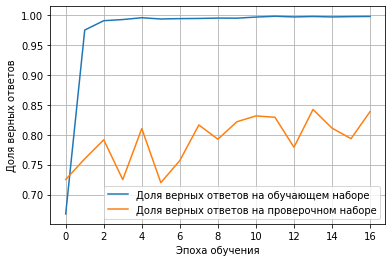

НЕЙРОНКА:  Сеть CONCATENATE

Генри  распознано  97 % сеть считает, что это  Генри ,  распознано ВЕРНО!
Стругацкие  распознано  72 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  87 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  77 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  84 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  87 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  84 %

Время обработки: 1948.45c


In [10]:
""" обьединим все сети """
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.5
epochs = 100
nlr = 0.0001
nEmbedding = 50

## входной слой
input_layer = Input(shape=(xLen, ))
layerEmb = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
layerSpDrop = SpatialDropout1D(nDropout)(layerEmb)
layerBatch = BatchNormalization()(layerSpDrop)
## Embedding + Dense
## Embedding + LSTM 
ELSTM_1 = LSTM(xLen//10, return_sequences=True)(layerBatch) # правильно поставить от xLen
## Embedding + Bidirectional LSTM
EBiLSTM_1 = Bidirectional(LSTM(xLen//10, return_sequences=True))(layerBatch) # правильно поставить от xLen
## Embedding + GRU
GRU_1 = GRU(xLen//10)(layerBatch) # правильно поставить от xLen #  было нельзя обьединять в conc_1 изза другой размерности
GRU_2 = Flatten()(GRU_1) 
## Conv1D
Conv1D_1 = Conv1D(xLen, 5, activation="relu")(layerBatch)
Conv1D_2 = MaxPooling1D(2)(Conv1D_1) #  было нельзя обьединять в conc_1 изза другой размерности
Conv1D_3 = Flatten()(Conv1D_2)

# CONCATENATEs
conc_1 = concatenate([layerSpDrop, ELSTM_1, EBiLSTM_1])
conc_2 = Flatten()(conc_1)
conc_3 = concatenate([conc_2, GRU_2, Conv1D_3])
conc_4 = Dropout(nDropout)(conc_3)
output_layer = Dense(nDense, activation='softmax')(conc_4)

modelMerge = Model(inputs=input_layer, outputs=output_layer )
modelMerge.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy']) # или Adam ???
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3, verbose = 1,  restore_best_weights = True)

#Обучаем на xTrain
history = modelMerge.fit(xTrain, yTrain, epochs=epochs, verbose=1,
                         callbacks = early_stopping,
                         validation_data = (xTest, yTest))

print(modelMerge.summary())

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelMerge, xTest6Classes, "Сеть CONCATENATE") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

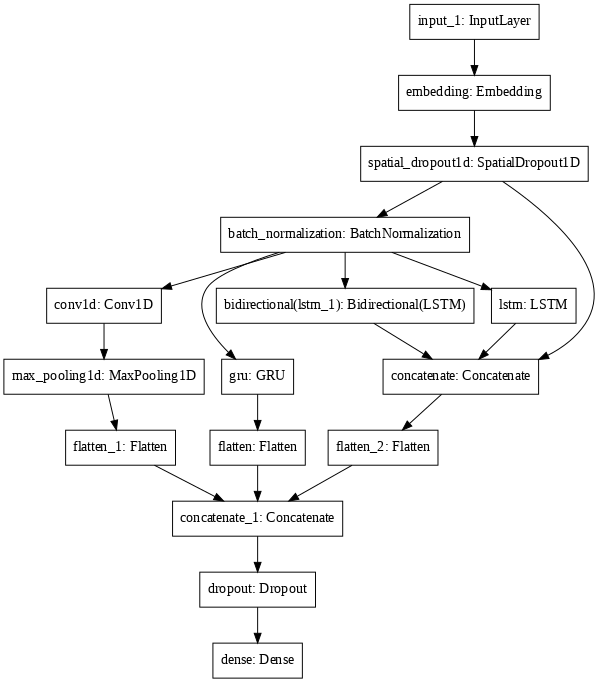

In [11]:
plot_model(modelMerge, dpi=70)

## Concatenate с Embedding: Dense + LSTM + Bidirectional LSTM + GRU + Conv1D + Simple RNN
---
не стал ждать итога в силу неоправданных затрат времени

In [ ]:
""" обьединим все сети + SimpleRNN: ну ооочень долго учится"""

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.0001
nEmbedding = 50

## входной слой
input_layer = Input(shape=(xLen, ))
layerEmb = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
layerSpDrop = SpatialDropout1D(nDropout)(layerEmb)
layerBatch = BatchNormalization()(layerSpDrop)
## Embedding + Dense
## Embedding + LSTM 
ELSTM_1 = LSTM(xLen//10, return_sequences=True)(layerBatch) # правильно поставить от xLen
## Embedding + Bidirectional LSTM
EBiLSTM_1 = Bidirectional(LSTM(xLen//10, return_sequences=True))(layerBatch) # правильно поставить от xLen
## Embedding + GRU
GRU_1 = GRU(xLen//10)(layerBatch) # правильно поставить от xLen #  было нельзя обьединять в conc_1 изза другой размерности
GRU_2 = Flatten()(GRU_1) 
## Conv1D
Conv1D_1 = Conv1D(xLen, 5, activation="relu")(layerBatch)
Conv1D_2 = MaxPooling1D(2)(Conv1D_1) #  было нельзя обьединять в conc_1 изза другой размерности
Conv1D_3 = Flatten()(Conv1D_2)
## Embedding + SimpleRNN
SimpleRNN_1 = SimpleRNN(xLen//10, return_sequences=True)(layerBatch) # правильно поставить от xLen

# CONCATENATE
conc_1 = concatenate([layerSpDrop, ELSTM_1, EBiLSTM_1, SimpleRNN_1])
conc_2 = Flatten()(conc_1)
conc_3 = concatenate([conc_2, GRU_2, Conv1D_3])
conc_4 = Dropout(nDropout)(conc_3)
output_layer = Dense(nDense, activation='softmax')(conc_4)

modelMerge2 = Model(inputs=input_layer, outputs=output_layer )
modelMerge2.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy'])
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 1,  restore_best_weights = True)

#Обучаем на xTrain
history = modelMerge2.fit(xTrain, yTrain, epochs=epochs, verbose=1,
                          callbacks = early_stopping,
                          validation_data = (xTest, yTest))

print(modelMerge2.summary())

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelMerge2, xTest6Classes, "Сеть CONCATENATE + SimpleRNN") #функция покажет какие классы и как распознаны верно'

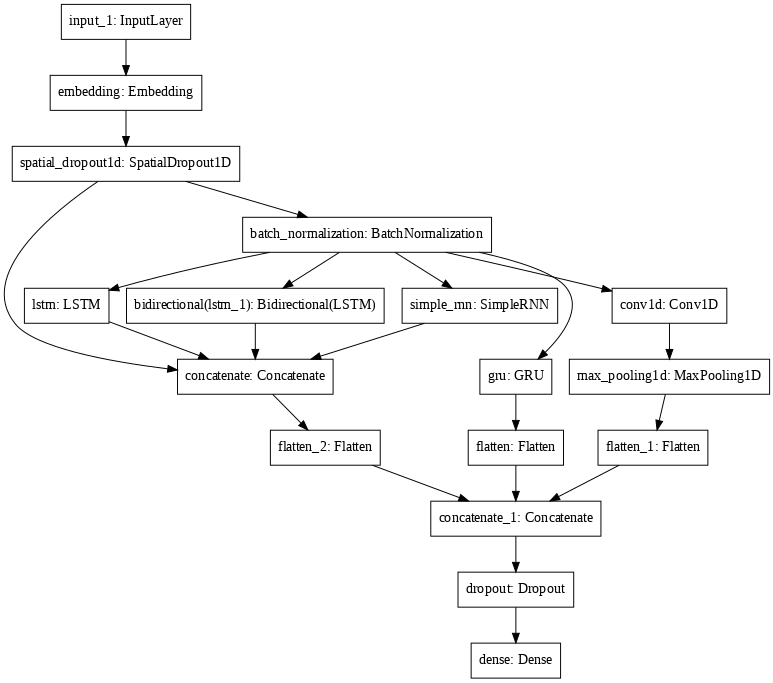

In [11]:
plot_model(modelMerge2, dpi=70)

## Concatenate с Embedding: Dense + GRU

Epoch 1/100
551/551 [==============================] - 37s 68ms/step - loss: 1.3896 - accuracy: 0.5160 - val_loss: 1.1469 - val_accuracy: 0.5432
Epoch 2/100
551/551 [==============================] - 37s 67ms/step - loss: 0.1244 - accuracy: 0.9660 - val_loss: 0.9149 - val_accuracy: 0.6836
Epoch 3/100
551/551 [==============================] - 37s 67ms/step - loss: 0.0246 - accuracy: 0.9961 - val_loss: 0.7955 - val_accuracy: 0.7454
Epoch 4/100
551/551 [==============================] - 37s 67ms/step - loss: 0.0130 - accuracy: 0.9977 - val_loss: 0.7864 - val_accuracy: 0.7464
Epoch 5/100
551/551 [==============================] - 37s 67ms/step - loss: 0.0074 - accuracy: 0.9986 - val_loss: 0.7681 - val_accuracy: 0.7549
Epoch 6/100
551/551 [==============================] - 37s 67ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.8221 - val_accuracy: 0.7540
Epoch 7/100
551/551 [==============================] - 37s 67ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.7946 - val_ac

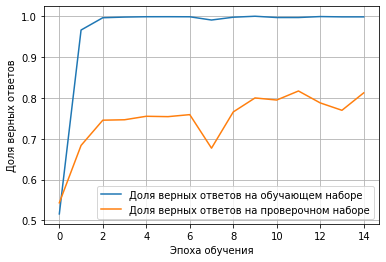

НЕЙРОНКА:  Сеть CONCATENATE

Генри  распознано  97 % сеть считает, что это  Генри ,  распознано ВЕРНО!
Стругацкие  распознано  66 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  83 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  63 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  87 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  84 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  81 %

Время обработки: 562.65c


In [14]:
""" обьединим сети """
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.4
epochs = 100
nlr = 0.0001
nEmbedding = 50

## входной слой
input_layer = Input(shape=(xLen, ))
layerEmb = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
layerSpDrop = SpatialDropout1D(nDropout)(layerEmb)
layerBatch = BatchNormalization()(layerSpDrop)
layerFlat = Flatten()(layerBatch)
## Embedding + Dense
## Embedding + GRU
GRU_1 = GRU(xLen//10)(layerBatch) # правильно поставить от xLen #  было нельзя обьединять в conc_1 изза другой размерности
GRU_2 = Flatten()(GRU_1) 
## Conv1D
Conv1D_1 = Conv1D(xLen, 5, activation="relu")(layerBatch)
Conv1D_2 = MaxPooling1D(2)(Conv1D_1) #  было нельзя обьединять в conc_1 изза другой размерности
Conv1D_3 = Flatten()(Conv1D_2)

# CONCATENATE
conc_1 = concatenate([layerFlat, GRU_2, Conv1D_3])
conc_2 = Dropout(nDropout)(conc_1)
output_layer = Dense(nDense, activation='softmax')(conc_2)

modelMerge3 = Model(inputs=input_layer, outputs=output_layer )
modelMerge3.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy']) # или Adam ???
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3, verbose = 1,  restore_best_weights = True)

#Обучаем на xTrain
history = modelMerge3.fit(xTrain, yTrain, epochs=epochs, verbose=1,
                          callbacks = early_stopping,
                          validation_data = (xTest, yTest))

print(modelMerge3.summary())

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelMerge3, xTest6Classes, "Сеть CONCATENATE") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

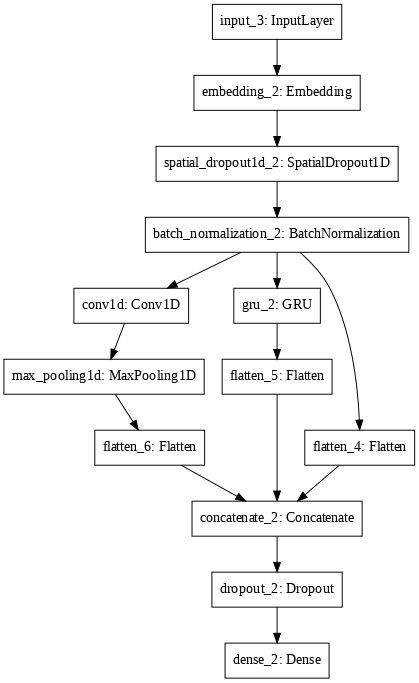

In [15]:
plot_model(modelMerge3, dpi=70)

## Лучшая!!! Concatenate с Embedding: Dense + GRU + Conv1D, но с разными дропаутами перед входом в сети

Epoch 1/100
551/551 [==============================] - 39s 70ms/step - loss: 1.5444 - accuracy: 0.4746 - val_loss: 1.2119 - val_accuracy: 0.5567
Epoch 2/100
551/551 [==============================] - 38s 69ms/step - loss: 0.2269 - accuracy: 0.9268 - val_loss: 0.8860 - val_accuracy: 0.6888
Epoch 3/100
551/551 [==============================] - 38s 69ms/step - loss: 0.0389 - accuracy: 0.9919 - val_loss: 0.8040 - val_accuracy: 0.7188
Epoch 4/100
551/551 [==============================] - 38s 69ms/step - loss: 0.0151 - accuracy: 0.9979 - val_loss: 0.7319 - val_accuracy: 0.7516
Epoch 5/100
551/551 [==============================] - 38s 69ms/step - loss: 0.0109 - accuracy: 0.9978 - val_loss: 0.7009 - val_accuracy: 0.7672
Epoch 6/100
551/551 [==============================] - 38s 69ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.7103 - val_accuracy: 0.7654
Epoch 7/100
551/551 [==============================] - 38s 69ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.6076 - val_ac

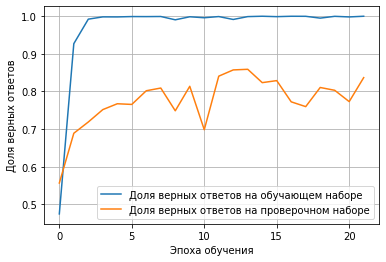

НЕЙРОНКА:  Сеть CONCATENATE

Генри  распознано  92 % сеть считает, что это  Генри ,  распознано ВЕРНО!
Стругацкие  распознано  80 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  82 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Клиффорд  распознано  92 % сеть считает, что это  Клиффорд ,  распознано ВЕРНО!
Макс  распознано  82 % сеть считает, что это  Макс ,  распознано ВЕРНО!
Брэдберри  распознано  93 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  85 %

Время обработки: 844.81c


In [17]:
""" обьединим сети """
cur_time = time.time() # засекаем время

nDense = 6
nDropout = 0.5
epochs = 100
nlr = 0.00005
nEmbedding = 50

## входной слой
input_layer = Input(shape=(xLen, ))
layerEmb = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)

## Embedding + Dense
Dense_1 = SpatialDropout1D(nDropout)(layerEmb)
Dense_2 = BatchNormalization()(Dense_1)
Dense_3 = Flatten()(Dense_2)

## Embedding + GRU
GRU_1 = SpatialDropout1D(nDropout)(layerEmb)
GRU_2 = BatchNormalization()(GRU_1)
GRU_3 = GRU(xLen//10)(GRU_2) # правильно поставить от xLen #  было нельзя обьединять в conc_1 изза другой размерности
GRU_4 = Flatten()(GRU_3)

## Conv1D
Conv1D_1 = SpatialDropout1D(nDropout)(layerEmb)
Conv1D_2 = BatchNormalization()(Conv1D_1)
Conv1D_3 = Conv1D(xLen, 5, activation="relu")(Conv1D_2)
Conv1D_4 = MaxPooling1D(2)(Conv1D_3) #  было нельзя обьединять в conc_1 изза другой размерности
Conv1D_5 = Flatten()(Conv1D_4)

# CONCATENATE
conc_1 = concatenate([Dense_3, GRU_4, Conv1D_5])
conc_2 = Dropout(nDropout)(conc_1)
output_layer = Dense(nDense, activation='softmax')(conc_2)

modelMerge4 = Model(inputs=input_layer, outputs=output_layer )
modelMerge4.compile(optimizer=Adam(nlr), loss='categorical_crossentropy', metrics=['accuracy']) # или Adam ???
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 4, verbose = 0,  restore_best_weights = True)

#Обучаем на xTrain
history = modelMerge4.fit(xTrain, yTrain, epochs=epochs, verbose=0,
                          callbacks = early_stopping,
                          validation_data = (xTest, yTest))

print(modelMerge4.summary())

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelMerge4, xTest6Classes, "Сеть CONCATENATE") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

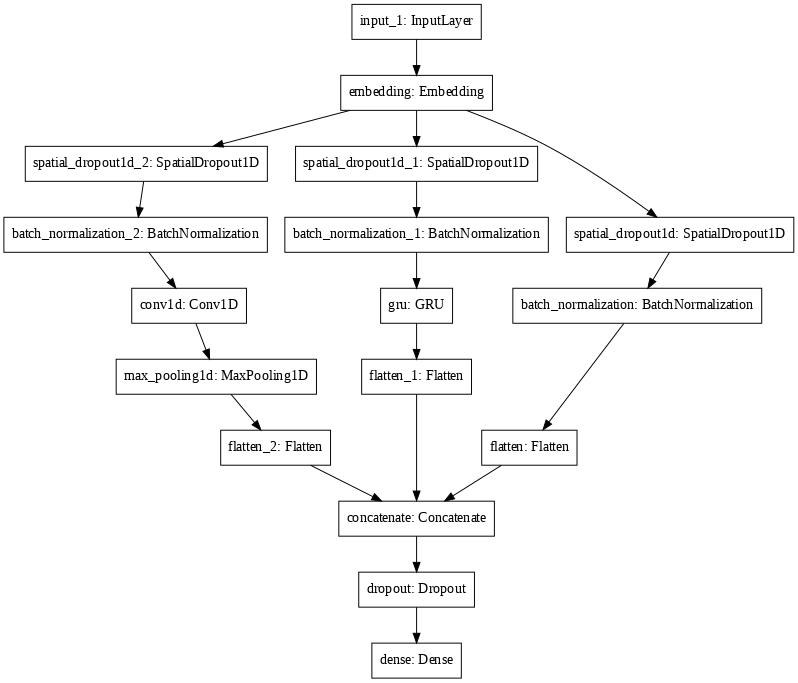

In [11]:
plot_model(modelMerge4, dpi=70)

# ВЫВОД
---
Надежность системы определяется надежностью самого слабого ее звена. Нет смысла запараллеливать сети, если качество обучения Concatenate зависит от самой слабой сети.. Ну и, входы в эти сети следует делать по-возможности, независимыми друг от друга (с разныни Dropout'ами, например).